In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

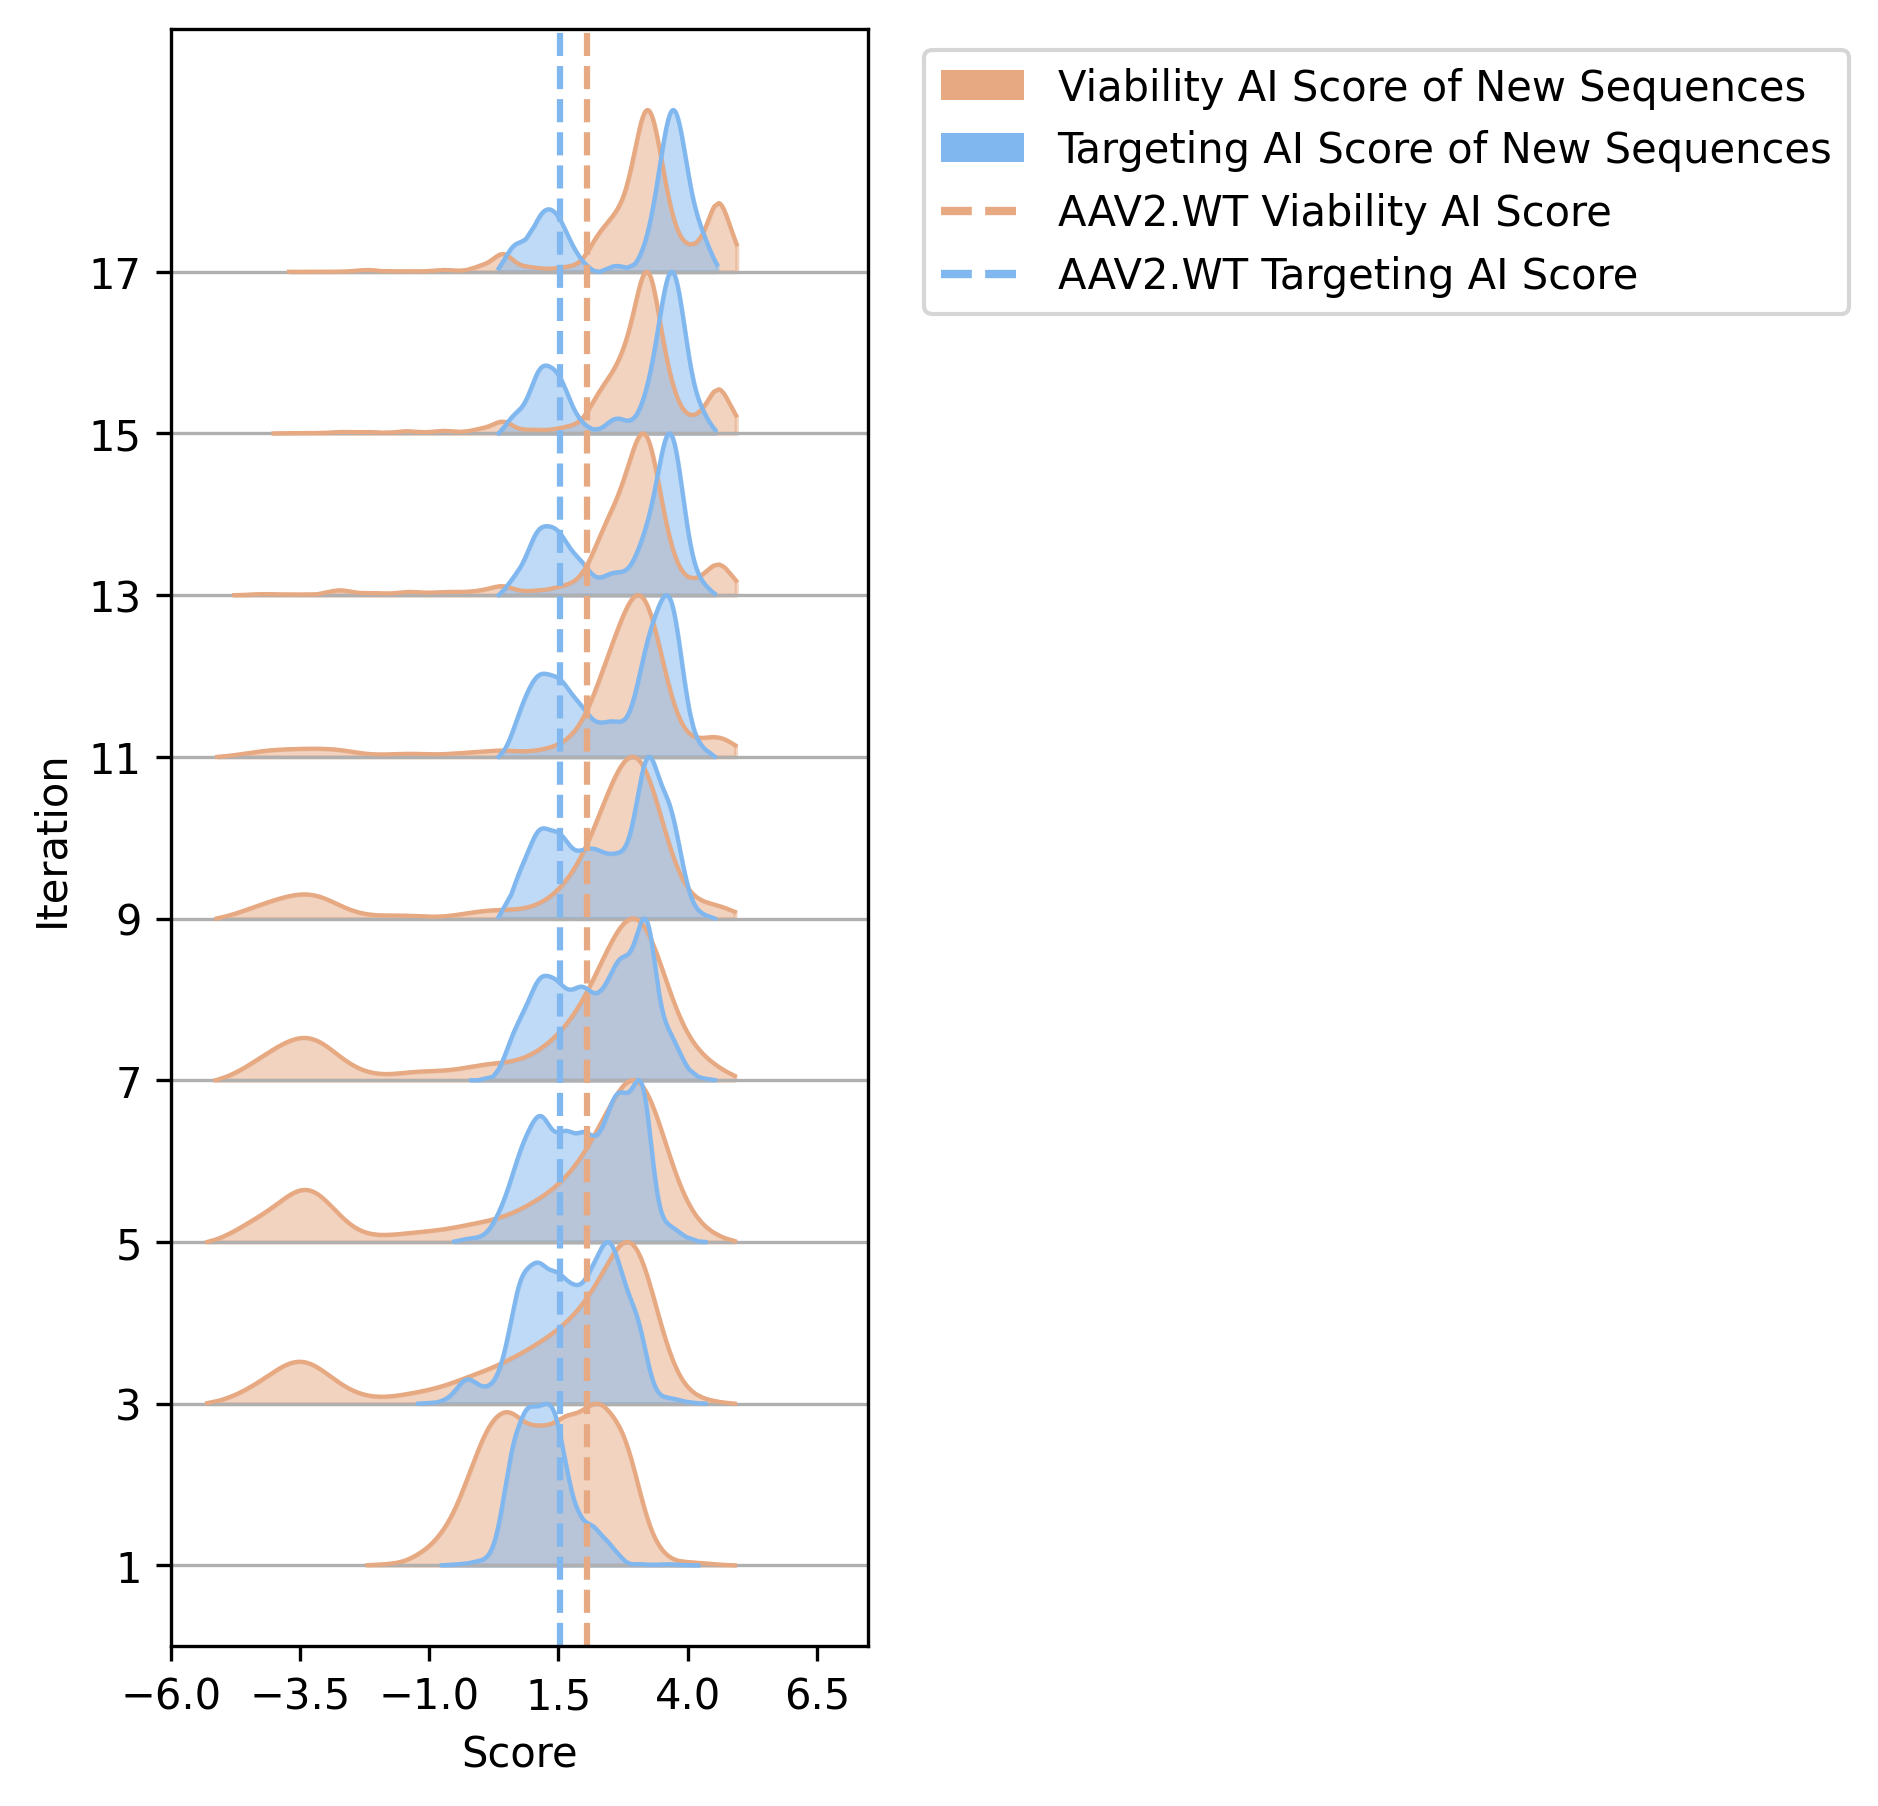

In [2]:
df = pd.read_csv('../figure_data/Extended_Data_Fig3_b_mouse.csv')
plt.figure(figsize=(3,7), dpi=300)

for i, gbdf in df.groupby(by='Iteration'):
    pred_viability = gbdf['Viability'].values
    pred_viability.sort()
    density = gaussian_kde(pred_viability)(pred_viability)
    density = (density - density.min()) / (density.max() - density.min())*2 + i+1
    plt.plot(pred_viability, density, c='#e6a982', linewidth=1)
    plt.fill_between(pred_viability, density, i+1, where=(density >= i+1), alpha=0.5, color='#e6a982')

    pred_target = gbdf['Targeting'].values
    pred_target.sort()
    density = gaussian_kde(pred_target)(pred_target)
    density = (density - density.min()) / (density.max() - density.min())*2 + i+1
    plt.plot(pred_target, density, c='#80b7ef', linewidth=1)
    plt.fill_between(pred_target, density, i+1, where=(density >= i+1), alpha=0.5, color='#80b7ef')
    
plt.xlabel('Score')
plt.ylabel('Iteration')
plt.yticks(ticks=np.arange(1, 19, 2))
plt.xticks(np.arange(-6,7.5,2.5))
plt.ylim(0,20)
plt.xlim(-6,7.5)

wt_targeting = 1.53
wt_viability = 2.06
plt.axvline(wt_targeting, c='#80b7ef', linestyle='--') # WT targeting
plt.axvline(wt_viability, c='#e6a982', linestyle='--') # WT Viability

plt.grid(axis="y")
custom_legend = [
    Patch(facecolor='#e6a982', label='Viability AI Score of New Sequences'),
    Patch(facecolor='#80b7ef', label='Targeting AI Score of New Sequences'),
    Line2D([], [], color='#e6a982', linewidth=2, linestyle='--', label='AAV2.WT Viability AI Score'),
    Line2D([], [], color='#80b7ef', linewidth=2, linestyle='--', label='AAV2.WT Targeting AI Score'),
]
plt.legend(handles=custom_legend, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()